**Проанализируем данные игроков в известном футбольном симуляторе - FIFA 23. По сути сравниваются показатели игроков за всю историю футбола.**

Источник - https://www.kaggle.com/datasets/mohammedessam97/fifa-23-fut-players-dataset?resource=download (Data of All players in Ultimate team mode in FIFA 23 including Football Legends)

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
from scipy import stats

In [ ]:
data = pd.read_csv('../content/Fifa 23 Fut Players.csv')
data["Player"] = data[["Name", "Version"]].apply("-".join, axis=1)

ratings = data.copy()
fifa = data.copy()
df = data.copy()

In [ ]:
def value_to_float(x): ##переведём стоимости в игре в числа, то есть уберём десятичные приставки К и М
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

data['PS'] = data['PS'].apply(value_to_float)

data.head(10)

,Name,Ratings,Position,Version,PS,SKI,WF,WR,PAC,SHO,...,DEF,PHY,Body,Popularity,BS,IGS,Club,League,Country,Player
0,Pelé,98,CAM,Icon Explosive,0.0,5,4,H \ M,95,96,...,60,76,"173cm | 5'8"" Unique (70kg)",1790,516,2513,FUT 22 ICONS,Icons,Brazil,Pelé-Icon Explosive
1,Ronaldo,96,ST,Icon Controlled,0.0,5,5,M \ M,97,95,...,45,76,"183cm | 6'0"" R9 (78kg)",2765,489,2341,FUT 22 ICONS,Icons,Brazil,Ronaldo-Icon Controlled
2,Zinedine Zidane,96,CAM,Icon Controlled,0.0,5,5,M \ M,85,92,...,75,86,"185cm | 6'1"" Average (77kg)",1031,529,2548,FUT 22 ICONS,Icons,France,Zinedine Zidane-Icon Controlled
3,Pelé,95,"CF CAM,ST",Icon Explosive,4200000.0,5,4,H \ M,96,93,...,56,75,"173cm | 5'8"" Unique (69kg)",1277,505,2452,FUT 22 ICONS,Icons,Brazil,Pelé-Icon Explosive
4,Ferenc Puskás,94,CF,Icon Controlled,0.0,4,3,H \ M,91,96,...,46,76,"172cm | 5'8"" Stocky (72kg)",1710,492,2396,FUT 22 ICONS,Icons,Hungary,Ferenc Puskás-Icon Controlled
5,Johan Cruyff,94,CF,Icon Explosive,0.0,5,5,H \ L,91,92,...,42,73,"180cm | 5'11"" Lean (71kg)",1575,483,2339,FUT 22 ICONS,Icons,Netherlands,Johan Cruyff-Icon Explosive
6,Lev Yashin,94,GK,Icon Controlled,0.0,1,3,M \ M,95,89,...,60,95,"189cm | 6'2"" High & Average (82kg)",724,510,1320,FUT 22 ICONS,Icons,Russia,Lev Yashin-Icon Controlled
7,Mané Garrincha,94,RW,Icon Explosive,0.0,5,4,M \ L,90,87,...,41,68,"169cm | 5'7"" Short & Lean- (72kg)",765,476,2301,FUT 22 ICONS,Icons,Brazil,Mané Garrincha-Icon Explosive
8,Paolo Maldini,94,CB,Icon Lengthy,0.0,2,4,M \ H,86,56,...,96,83,"186cm | 6'1"" Average (83kg)",933,465,2140,FUT 22 ICONS,Icons,Italy,Paolo Maldini-Icon Lengthy
9,Ronaldinho,94,LW,Icon Controlled,0.0,5,4,H \ L,92,90,...,37,81,"180cm | 5'11"" Ronaldinho (78kg)",1802,486,2328,FUT 22 ICONS,Icons,Brazil,Ronaldinho-Icon Controlled


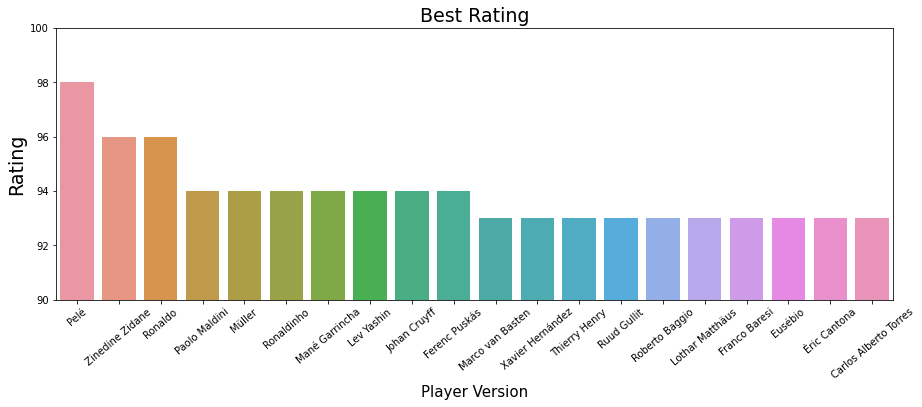

In [ ]:
df = df.sort_values(by='Ratings' , ascending=False).drop_duplicates(subset='Name').head(20)
plt.figure(figsize=(15,5))
sns.barplot( x=df['Name'] , y=df['Ratings'] , ci=None)
plt.ylabel('Rating' , fontsize=19)
plt.xlabel('Player Version' , fontsize=15)
plt.title("Best Rating" ,fontsize=19)
plt.ylim(90,100)
plt.xticks(rotation=40)
plt.show()

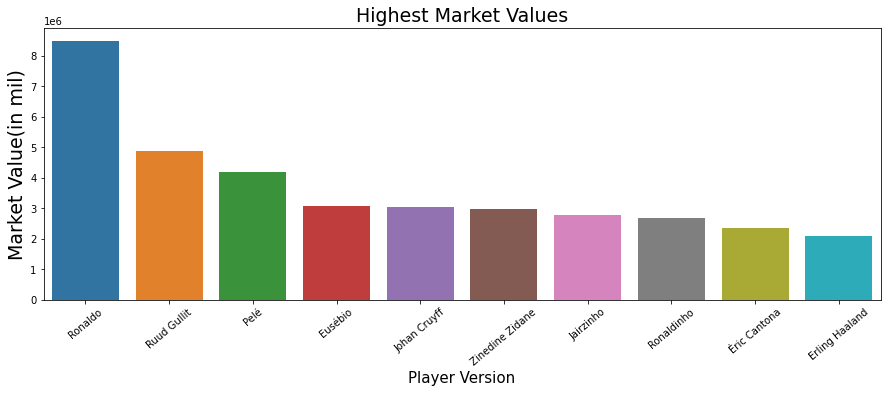

In [ ]:
df = data.copy()
df = df.sort_values(by='PS' , ascending=False).drop_duplicates(subset='Name').head(10)
plt.figure(figsize=(15,5))
sns.barplot( x=df['Name'] , y=df['PS'] , ci=None)
plt.ylabel('Market Value(in mil)' , fontsize=19)
plt.xlabel('Player Version' , fontsize=15)
plt.title("Highest Market Values" ,fontsize=19)
plt.xticks(rotation=40)
plt.show()

Например, можно посмотреть, у какой страны в фифе больше всего игроков входят в топ-1000 с лучшим рейтингом в игре

In [ ]:
top1000 = data.sort_values(by='Ratings' , ascending=False).drop_duplicates(subset='Name').head(1000)
res = top1000.groupby(['Country']).count().reset_index()

In [ ]:
fig = px.bar(res.sort_values(by=['Ratings'],ascending = False)[0:10], x='Country', y='Ratings',color = 'Ratings')
fig.show()

У Испании больше всего высокорейтинговых футболистов. Далее Франция, Англия, Бразилия, Германия. В общем понятно, все топовые сборные

1. **Аппроксимация распределений данных с помощью ядерных оценок.**

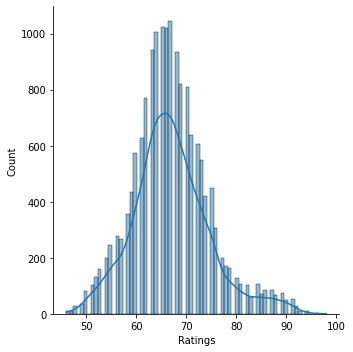

In [ ]:
sns.displot(x='Ratings',
            kde=True,
            data=data);

Ага, понятно, теперь можно прикинуть средний рейтинг (в районе 65) и то, как ведёт себя количество игроков с рейтингами ниже 50 (их почти нет) и выше 90 (их тоже очень мало). При этом наблюдается перекос в сторону рейтингов больше 65, то есть хорошие (75+) рейтинги получают сильно больше игроков, чем рейтинги меньше 55-, при том, что пик приходится всё равно в районе 65. Теперь взглянем на плотность ядра распределения рейтингов

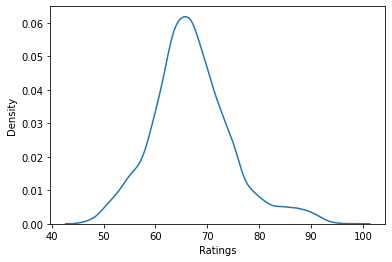

In [ ]:
sns.kdeplot(x='Ratings',
            data=data);

**2. Анализ данных с помощью cdplot, dotchart, boxplot и stripchart**

Давайте посмотрим на распределение рейтингов лучших 50 игроков в зависимости от их позиции на поле

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



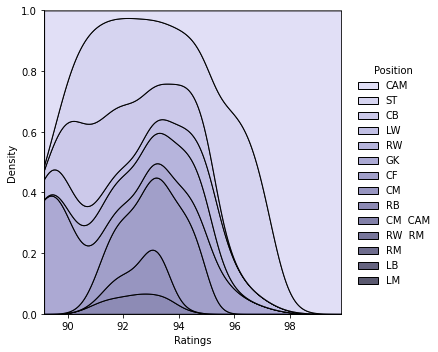

In [ ]:
df = data.copy()
top = df.sort_values(by='Ratings' , ascending=False).drop_duplicates(subset='Name').head(50)

#питоновский аналог cdplot

sns.displot(data = top, x = 'Ratings', 
	hue = 'Position', 
	multiple="fill", kind="kde", palette="ch:rot=-0,light=.85")

Ага, интуитивно понятно, что самые топовые рейтинги в основном у игроков группы атаки. Но интересно, что третьей по численности позицией среди лучших 50 игроков это центральный защитник. Не знаю, как это объяснить, мне казалось, что будет так: ST - striker, CAM - central attack. midfiler, GK - goalkeeper. Но ладно

In [ ]:
#аналог dotchart

import plotly.express as px
fig = px.scatter(top, y ="Position", x = "Ratings", height=600)
fig.update_yaxes(type='category', tickvals=top['Position'].tolist())
fig.show()

Теперь проанализируем топовых игроков по странам, проверим, есть ли у какой-то страны сразу несколько лучших игроков за всю историю футбола

In [ ]:
#аналог dotchart

fig = px.scatter(top, y ="Country", x = "Ratings", height=600)
fig.update_yaxes(type='category', tickvals=top['Country'].tolist())
fig.show()

Да, у Бразилии много легендарных игроков... Затесался даже один игрок из России (это Лев Яшин)

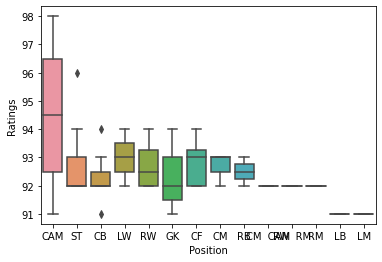

In [ ]:
#аналог boxplot

sns.boxplot(data = top, y = "Ratings", x = "Position")

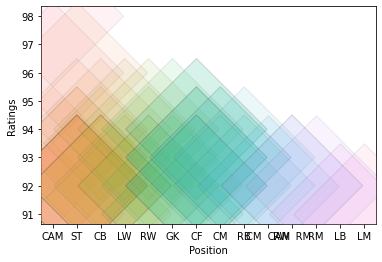

In [ ]:
#аналог stripchart

sns.stripplot(
    data=top, y = "Ratings", x = "Position",
    jitter=False, s=100, marker="D", linewidth=1, alpha=0.1,
)

**3. Проверить, являются ли наблюдения выбросами с точки зрения формальных статистических критериев Граббса и Q-теста Диксона. Визуализировать результаты**

In [ ]:
!pip install neulab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


сделаем тест Диксона на поиск выброса в рейтингах и популярности 

In [ ]:
from neulab.OutlierDetection import DixonTest

d = {'Ratings': data['Ratings'].head(25), 'Popularity': data['Popularity'].head(25)}
df = pd.DataFrame(data=d)
qtest = DixonTest(dataframe=df, q=95, info=True, autorm=True)

Detected outlier: 
   Ratings  Popularity
0       98        1790


Ага, Пеле это выброс

In [ ]:
def q_test_for_smallest_point(dataset):
    q_ref = 0.29  # the reference Q value for a significance level of 95% and 30 data points
    q_stat = (dataset[1] - dataset[0])/(dataset[-1] - dataset[0])

    if q_stat > q_ref:
        print("Since our Q-statistic is %f and %f > %f, we have evidence that our "
              "minimum point IS an outlier to the data." %(q_stat, q_stat, q_ref))
    else:
        print("Since our Q-statistic is %f and %f < %f, we have evidence that our "
              "minimum point is NOT an outlier to the data." %(q_stat, q_stat, q_ref))

In [ ]:
dataset = data[0:25]['Popularity'].values.tolist()
dataset.sort()
q_test_for_smallest_point(dataset)

Since our Q-statistic is 0.028094 and 0.028094 < 0.290000, we have evidence that our minimum point is NOT an outlier to the data.


Минимальных выбросов нет

Теперь тест Граббса

In [ ]:
!pip install outlier_utils
from outliers import smirnov_grubbs as grubbs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dat =  data[0:30]['Ratings'].values.tolist()
grubbs. max_test_outliers (dat, alpha=.05)

[98]

Среди 30 лучших снова Пеле это выброс, но если попробовать 1000 лучших:

In [ ]:
dat =  data[0:1000]['Ratings'].values.tolist()
grubbs. max_test_outliers (dat, alpha=.05)

[]

То выбросов с 5% уровнем для теста Граббса нет

**4. Воспользоваться инструментами для заполнения пропусков в данных. Пропуски внести вручную и сравнить результаты заполнения с истинными значениями.**

In [ ]:
mas = np.array(data['Ratings'])
df = pd.DataFrame({'val' : mas})
df

,val
0,98
1,96
2,96
3,95
4,94
...,...
16451,46
16452,46
16453,46
16454,46


In [ ]:
# Создадим 100 пропусков

missing_indexes = np.random.choice(df.shape[0], 100)
df['val'][missing_indexes] = np.nan
df['val'].isna().sum()

100

RMSE : 7.579213486775615


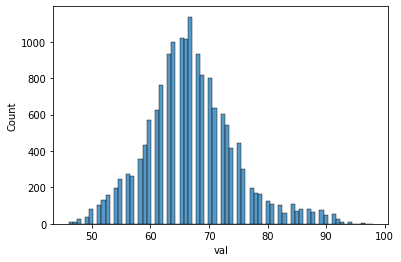

In [ ]:
# 1 способ - заполнить средним

way_1 = df['val'].fillna(df['val'].mean())
sns.histplot(way_1)
print(f'RMSE : {np.sqrt(np.mean((way_1[missing_indexes] - mas[missing_indexes]) ** 2))}')

RMSE : 7.708436936240706


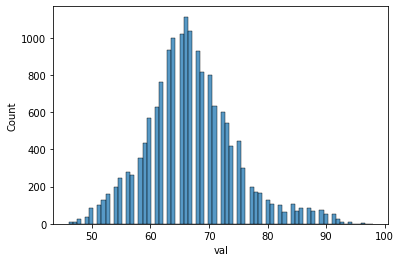

In [ ]:
# 2 способ - заполнить медианой

way_2 = df['val'].fillna(df['val'].median())
sns.histplot(way_2)
print(f'RMSE : {np.sqrt(np.mean((way_2[missing_indexes] - mas[missing_indexes]) ** 2))}')

RMSE : 7.577598564189053


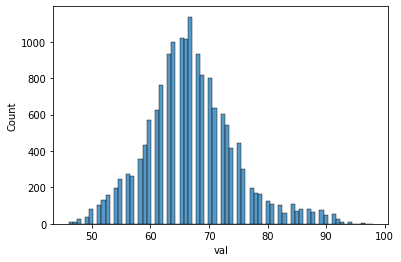

In [ ]:
# 3 способ - заполнить модой

from scipy.stats import mode

way_3 = df['val'].fillna(mode(df['val'], nan_policy='omit')[0][0])
sns.histplot(way_3)
print(f'RMSE : {np.sqrt(np.mean((way_3[missing_indexes] - mas[missing_indexes]) ** 2))}')

Результат такой: заполнением средним или модой оказалось чуть удачнее, чем медианой. Но в целом для имеющихся данных (рейтинги в фифе) пропущенные значения заполнять средним оказывается, конечно, менее удачно, чем для чисто нормального распределения, потому что рейтинги отклоняются, и причём с перекосом в большую сторону

**5,6. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности (критерии Колмогорова-Смирнова, ШапироУилка, Андерсона-Дарлинга, Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия). Рассмотреть выборки малого (не более 50-100 элементов) и умеренного (1000-5000 наблюдений) объемов.** 

In [ ]:
from scipy.stats import kstest, shapiro, anderson, cramervonmises, norm
from statsmodels.stats.diagnostic import lilliefors

mu = 0
sigma = 1

data = norm.rvs(size=50)
bigdata = norm.rvs(size=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



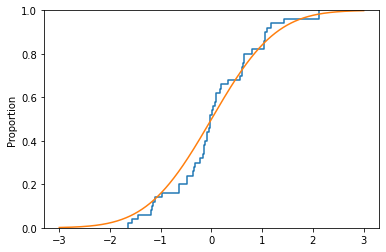

In [ ]:
# Анализ с помощью графиков эмпирических функций распределений

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
y = norm.cdf(x)

sns.ecdfplot(data)
sns.lineplot(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



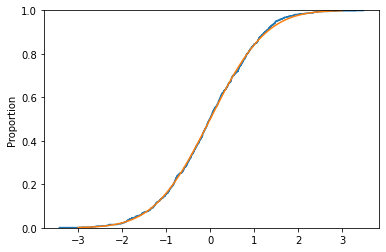

In [ ]:
sns.ecdfplot(bigdata)
sns.lineplot(x,y)

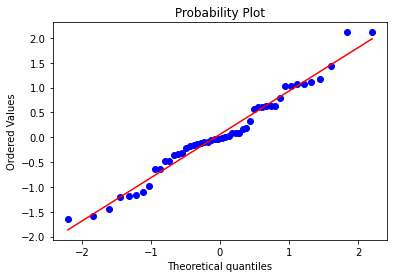

In [ ]:
# Анализ с помощью метода квантилей

stats.probplot(data, dist="norm", plot=plt)
plt.show()

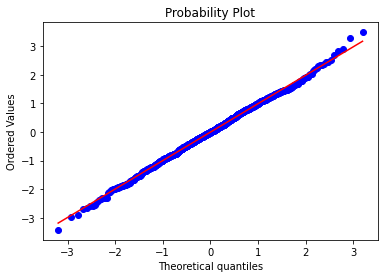

In [ ]:
stats.probplot(bigdata, dist="norm", plot=plt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



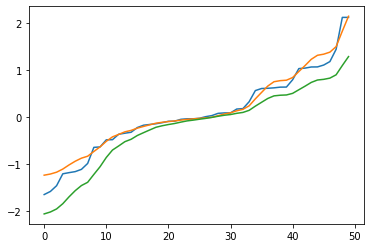

In [ ]:
# анализ при помощи метода огибающих
def ma(Data, lookback):
    m = np.zeros_like(Data)
    for i in range(len(Data)):
        real_lookback = lookback
        if i < lookback:
            real_lookback = i
        m[i] = (Data[i - real_lookback : i + 1].mean())
    return m

def envelopes(Data, lookback, deviation):
    m = ma(Data, lookback)
    signs = np.sign(m)
    a = m + np.abs((m * deviation))
    b = m - np.abs((m * deviation))
    return a, b

data_sorted = np.array(sorted(data))
numbers = [i[0] for i in enumerate(data_sorted)]
a, b = envelopes(data_sorted, 3, 0.25)

sns.lineplot(numbers, data_sorted)
sns.lineplot(numbers, a)
sns.lineplot(numbers, b)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



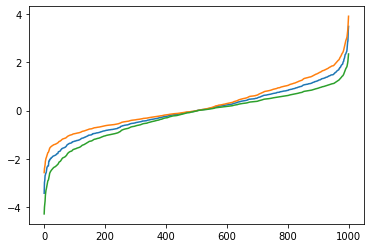

In [ ]:
bigdata_sorted = np.array(sorted(bigdata))
numbers = [i[0] for i in enumerate(bigdata_sorted)]
a, b = envelopes(bigdata_sorted, 3, 0.25)

sns.lineplot(numbers, bigdata_sorted)
sns.lineplot(numbers, a)
sns.lineplot(numbers, b)

In [ ]:
# Критерий Колмогорова-Смирнова

kstest(data, stats.norm.cdf)

KstestResult(statistic=0.1182534563313744, pvalue=0.452124954534607)

In [ ]:
kstest(bigdata, stats.norm.cdf)

KstestResult(statistic=0.017591068420740652, pvalue=0.9108752732360061)

In [ ]:
#Критерий Шапиро-Уилка

shapiro(data)

ShapiroResult(statistic=0.9734483361244202, pvalue=0.3178648352622986)

In [ ]:
shapiro(bigdata)

ShapiroResult(statistic=0.998711884021759, pvalue=0.6965686678886414)

In [ ]:
# Критерий Андерсона-Дарлинга

anderson(data)

AndersonResult(statistic=0.48929353581671364, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
anderson(bigdata)

AndersonResult(statistic=0.3156395027885992, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
# Критерий Крамера фон Мизеса

cramervonmises(data, stats.norm.cdf)

CramerVonMisesResult(statistic=0.14850186107932567, pvalue=0.39521412227918606)

In [ ]:
cramervonmises(bigdata, stats.norm.cdf)

CramerVonMisesResult(statistic=0.03323597764488745, pvalue=0.9644324279823558)

In [ ]:
# Критерий Колмогорова-Смирнова в модификации Лиллиефорса

lilliefors(data)

(0.10563615269909632, 0.18401346733433976)

In [ ]:
lilliefors(bigdata)

(0.019103921713315986, 0.5836616908823125)

**7. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев:**

**Стьюдента, включая односторонние варианты, когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних значений больше (или меньше) другого. Реализовать оценку мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности.**


Возьмём снова рейтинги футболистов в качестве первого распределения.

А в качестве второго возьмём среднее показателей на их карточках в фифе: скорость, удар, пас, дриблинг, защита, физические данные.

Давайте проверим такую гипотезу: средние этих распределений совпадают.

In [ ]:
# Student's t-test
 
from numpy.random import randn
from scipy.stats import ttest_ind
data1 = fifa['Ratings'] 
data2 = (fifa['PAC'] + fifa['SHO'] + fifa['PAS'] + fifa['DRI'] + fifa['DEF'] + fifa['PHY']) / 6

In [ ]:
# Двусторонний
# Гипотеза H₀: Средние двух выборок равны, альтернативная гипотеза - не равны
stat, p = ttest_ind(data1, data2)
for alpha in {0.01, 0.05, 0.1}:
  if p > alpha:
    print('При alpha = ', alpha, 'принять H₀')
  else:
    print('При alpha = ', alpha, 'Отклонить H₀')

При alpha =  0.05 Отклонить H₀
При alpha =  0.1 Отклонить H₀
При alpha =  0.01 Отклонить H₀


In [ ]:
# Меньше
# Гипотеза H₀: Среднее первой выборки больше, альтернативная гипотеза - меньше
stat, p = ttest_ind(data1, data2, alternative = 'less')
for alpha in {0.01, 0.05, 0.1}:
  if p > alpha:
    print('При alpha = ', alpha, 'принять H₀')
  else:
    print('При alpha = ', alpha, 'Отклонить H₀')

При alpha =  0.05 принять H₀
При alpha =  0.1 принять H₀
При alpha =  0.01 принять H₀


In [ ]:
# Больше
# Гипотеза H₀: Среднее первой выборки меньше, альтернативная гипотеза - больше
stat, p = ttest_ind(data1, data2, alternative = 'greater')
alpha = 0.05
for alpha in {0.01, 0.05, 0.1}:
  if p > alpha:
    print('При alpha = ', alpha, 'принять H₀')
  else:
    print('При alpha = ', alpha, 'Отклонить H₀')

При alpha =  0.05 Отклонить H₀
При alpha =  0.1 Отклонить H₀
При alpha =  0.01 Отклонить H₀


In [ ]:
# Мощность
import statsmodels.stats.power as smp
print(smp.ttest_power(0.8, nobs=20, alpha=0.05, alternative='larger'))

0.9641727854966735


По критерию Стьюдента гипотеза верна о том, что в среднем рейтинг равен среднему показателей, верна. Хотя для конкретно взято игрока это часто оказывается не так - влияют ещё факторы сравнения с другими и разные коммерческие причины у EA Sports...

**Уилкоксона-Манна-Уитни (ранговые)**

Тест Уилкоксона идеально подходит для сравнения маленьких выборок зависимых, где количество испытуемых/исследований больше 5, но меньше 50.


In [ ]:
#Критерий знакового ранга Уилкоксона — это непараметрическая версия t-критерия для парных выборок .

#Он используется для проверки наличия значительной разницы между двумя средними значениями генеральной совокупности, 
#когда распределение различий между двумя выборками нельзя считать нормальным.

stats.wilcoxon(data1[0:5], data2[0:5])

WilcoxonResult(statistic=0.0, pvalue=0.0625)

In [ ]:
stats.wilcoxon(data1[0:50], data2[0:50])

WilcoxonResult(statistic=0.0, pvalue=7.526228061894621e-10)

Опять же подтверждение того, что для, скажем, пяти лучших игроков, средние значения рейтинги и усреднённого значения показателей, не равны (показатель pvalue больше 0.05), а вот для всей выборки уже почти наверняка (pvalue в районе нуля с погрешностью порядка 10 в -7 степени) равны

Тест Манна-Уитни используется при сравнении двух независимых выборок, также имеющих отклонения от нормального распределения.

In [ ]:
#U- критерий Манна-Уитни используется для сравнения различий между двумя выборками
#когда распределение выборки не является нормальным, а размеры выборки малы (n < 30).

stats. mannwhitneyu (data1[0:20] / data1[0:20].mean(), 
                     fifa['Popularity'][0:20] / fifa['Popularity'][0:20].mean(), 
                     alternative='two-sided')

MannwhitneyuResult(statistic=260.0, pvalue=0.10458704471639454)

Из независимых грубо говоря с натяжкой можно взять рейтинги и популярность игроков. Получили значение pvalue в районе 10%, то есть уровень значимости в 5% гипотеза о равенстве не проходит.

**Фишера, Левене, Бартлетта, Флигнера-Килина (проверка гипотез об однородности дисперсий).**

In [ ]:
def trash(sample_1, sample_2):
    f = np.var(sample_1, ddof=1)/np.var(sample_2, ddof=1)
    x = np.array(sample_1)
    y = np.array(sample_2)
    p_value = 1-stats.f.cdf(f, x.size-1, y.size-1)
    
    print('c) Тест Фишера:\n\tStatistics=%.3f, p=%.3f' % (f, p_value))
    alpha = 0.05
    if p_value > alpha:
        print('\tSame distribution (fail to reject H0)')
    else:
        print('\tDifferent distribution (reject H0)')
        
    stat, p = stats.levene(sample_1, sample_2, center = 'mean')
    print('   Тест Левене:\n\tStatistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('\tSame distribution (fail to reject H0)')
    else:
        print('\tDifferent distribution (reject H0)')
        
    stat, p = stats.bartlett(sample_1, sample_2)
    print('   Тест Бартлета:\n\tStatistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('\tSame distribution (fail to reject H0)')
    else:
        print('\tDifferent distribution (reject H0)')
        
    stat, p = stats.fligner(sample_1, sample_2, center = 'mean')
    print('   Тест Флигнера-Килина:\n\tStatistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('\tSame distribution (fail to reject H0)')
    else:
        print('\tDifferent distribution (reject H0)')

In [ ]:
trash(data1, data2)

c) Тест Фишера:
	Statistics=1.140, p=0.000
	Different distribution (reject H0)
   Тест Левене:
	Statistics=11.309, p=0.001
	Different distribution (reject H0)
   Тест Бартлета:
	Statistics=70.913, p=0.000
	Different distribution (reject H0)
   Тест Флигнера-Килина:
	Statistics=6.936, p=0.008
	Different distribution (reject H0)


In [ ]:
trash(data1 / data1.mean(), 
                     fifa['Popularity'] / fifa['Popularity'].mean())

c) Тест Фишера:
	Statistics=0.000, p=1.000
	Same distribution (fail to reject H0)
   Тест Левене:
	Statistics=1157.963, p=0.000
	Different distribution (reject H0)
   Тест Бартлета:
	Statistics=111771.535, p=0.000
	Different distribution (reject H0)
   Тест Флигнера-Килина:
	Statistics=20485.073, p=0.000
	Different distribution (reject H0)


Различия возникли только в тесте Фишера

**8.Исследовать корреляционные взаимосвязи в данных с помощью
коэффициентов корреляции Пирсона, Спирмена и Кендалла.**

In [ ]:
 np.corrcoef(data1, data2)

array([[1.        , 0.86892282],
       [0.86892282, 1.        ]])

In [ ]:
print(np.corrcoef(fifa['PAC'], fifa['DRI'])[0][1])

0.5486414446769278


In [ ]:
coef, p = scipy.stats.spearmanr(data1, data2)
print(coef)
coef, p = scipy.stats.kendalltau(data1, data2)
print(coef)


0.8338241281337987 0.0
0.6687050115075446 0.0


In [ ]:
coef, p = scipy.stats.spearmanr(fifa['PAC'], fifa['DRI'])
print(coef)
coef, p = scipy.stats.kendalltau(fifa['PAC'], fifa['DRI'])
print(coef)

0.5419506742627955 0.0
0.391192783901761 0.0


**9. Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.**

In [ ]:
#метод хи-квадрат
contigency = pd.crosstab(fifa['Ratings'][0:30], fifa['Country'][0:30])
contigency

Country,Brazil,England,France,Germany,Hungary,Italy,Netherlands,Northern Ireland,Portugal,Russia,Spain
Ratings,,,,,,,,,,,
92,0,2,0,0,0,3,0,0,0,0,1
93,1,0,2,1,0,2,2,1,1,0,1
94,3,0,1,1,1,1,1,0,0,1,0
95,1,0,0,0,0,0,0,0,0,0,0
96,1,0,1,0,0,0,0,0,0,0,0
98,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contigency)
p
#dof - степень свободы, p - p-value

0.9260554855167805

In [ ]:
#тест Фишера
import scipy.stats as stats
contigency = pd.crosstab(fifa['Popularity'][0:2], fifa['Ratings'][0:2])
print(stats.fisher_exact(contigency))

(0.0, 1.0)


In [ ]:
#тест Макнемара
from statsmodels.stats.contingency_tables import mcnemar
print(mcnemar(np.array(contigency), exact=False)) 

pvalue      0.47950012218695337
statistic   0.5


**10.Проверить наличие мультиколлинеарности в данных с помощью
корреляционной матрицы и фактора инфляции дисперсии.**

In [ ]:
data = fifa[['PAC', 'SHO', 'PAS', 'DRI']]

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,PAC,SHO,PAS,DRI
PAC,1.000000,0.370084,0.325883,0.548641
SHO,0.370084,1.000000,0.711984,0.798552
PAS,0.325883,0.711984,1.000000,0.863575
DRI,0.548641,0.798552,0.863575,1.000000


In [ ]:
#фактор инфляции дисперсии

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
y, X = dmatrices('Ratings ~ PAC+SHO+PAS+DRI+DEF+PHY', data=fifa, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,98.243941,Intercept
1,1.674638,PAC
2,5.290872,SHO
3,6.432600,PAS
4,7.639174,DRI
5,3.163944,DEF
6,1.671228,PHY
